# Pretty plots

In this section, we will learn to make plots accessible, clear and aesthetically pleasing.

In [15]:
# The examples require dplyr and ggplot2
library(dplyr)
library(ggplot2)

## Layers

ggplots are built in layers. Layers are connected with plus signs. The first layer is on the bottom and the last layer is on the top. 

<div class="admonition warning">
<div class="title" style="background: pink; padding: 10px">Warning</div>
    <p>The plus sign connecting layers must come <b>before the line break</b>.</p>
</div>

(pretty_plots:labels)= 
## Titles and labels
To increase clarity, every plot should have a descriptive title and descriptive axis labels that include units. We accomplish this by adding a `labs()` layer to our ggplot.

```labs( title = 'TITLE', x = 'x-AXIS_LABEL', y = 'y-AXIS_LABEL')```

### Examples

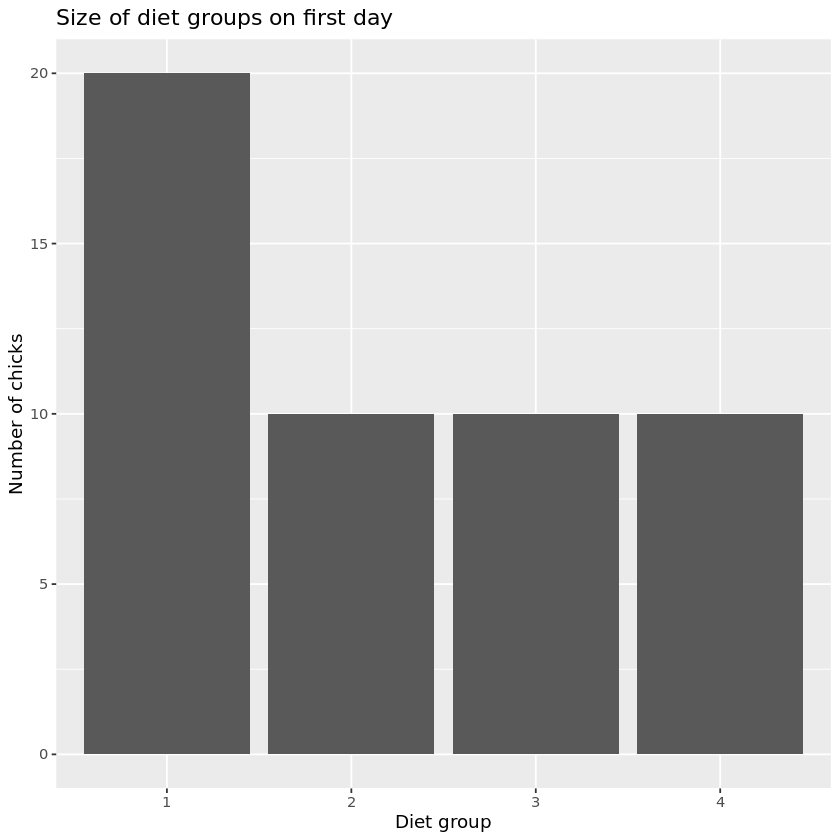

In [8]:
# Size of diet groups bar chart
ChickWeight %>%
    filter(Time == 0) %>%
    ggplot(aes(x=Diet)) +
        geom_bar() +
        labs( title = 'Size of diet groups on first day',
             x = 'Diet group',
             y = 'Number of chicks'
        )

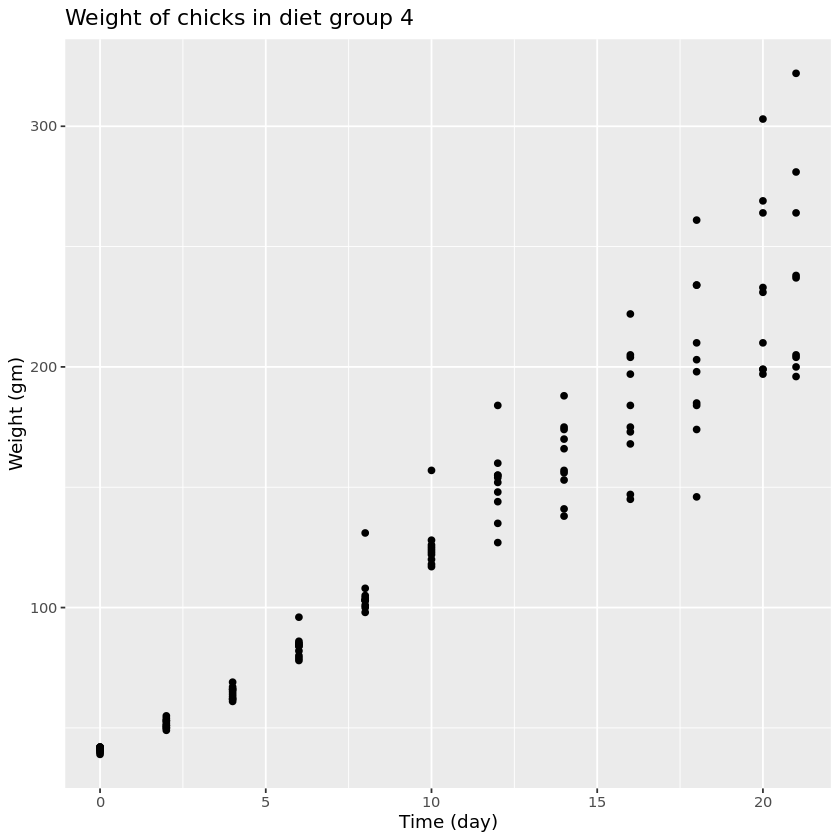

In [10]:
# Chick weight diet group 4 scatter plot
ChickWeight %>%
    filter(Diet == 4) %>%
    ggplot(aes(x = Time, y = weight)) +
        geom_point() + 
        labs( title = "Weight of chicks in diet group 4",
             x = 'Time (day)',
             y = 'Weight (gm)'
        )

(pretty_plots:themes)= 
## Built-in themes

The ggplot library has multiple built-in themes to which you can use to set the style of your plots. The black and white theme `theme_bw()` and the classic theme `theme_classic()` are two of the options. See the [ggplot documentation](https://ggplot2.tidyverse.org/reference/ggtheme.html) for more built-in themes. 

Themes should be added as the laster later to a ggplot so that the effect all other layers. 

Adding `base_size = NUMBER` inside the parentheses of a built-in theme scales the font size. The default value is 11; choosing a number larger than that will increase the font size. 

### Examples

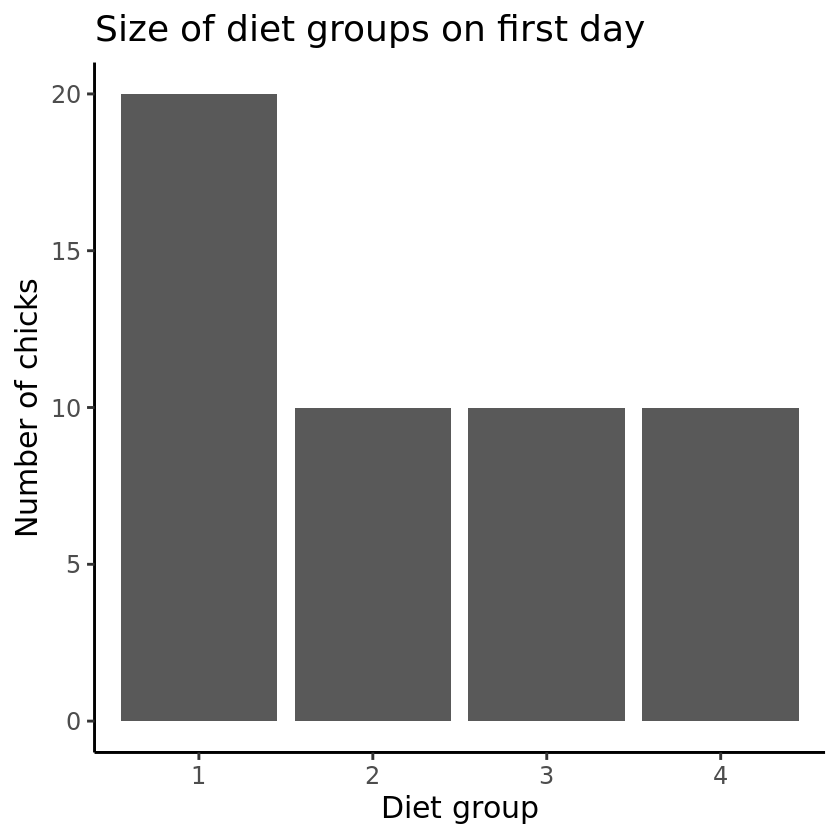

In [11]:
# Size of diet groups bar chart
ChickWeight %>%
    filter(Time == 0) %>%
    ggplot(aes(x=Diet)) +
        geom_bar() +
        labs( title = 'Size of diet groups on first day',
             x = 'Diet group',
             y = 'Number of chicks'
        ) +
    theme_classic(base_size = 18)

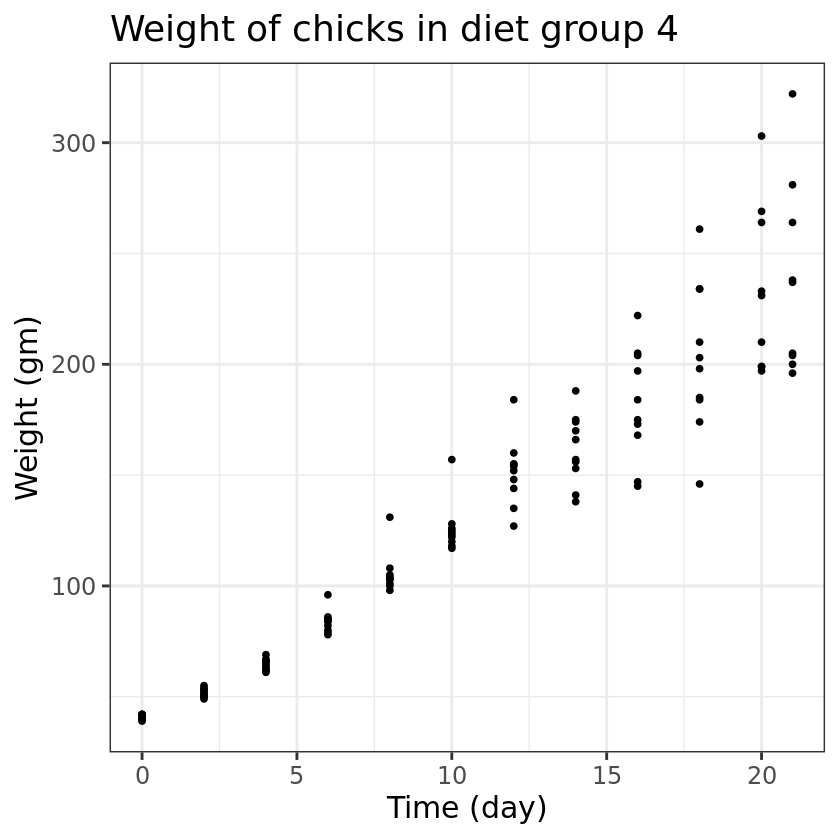

In [14]:
# Chick weight diet group 4 scatter plot
ChickWeight %>%
    filter(Diet == 4) %>%
    ggplot(aes(x = Time, y = weight)) +
        geom_point() + 
        labs( title = "Weight of chicks in diet group 4",
             x = 'Time (day)',
             y = 'Weight (gm)'
        ) +
    theme_bw(base_size = 18)

(pretty_plots:colors)=
## Colors

Plots made by `ggplot()` have two main color properties `color` and `fill`. Generally, `color` refers to the color of the border and `fill` refers to the color of the interior. One notable exception to this is the default shape of points in `geom_point()`; these dots do not have a border, so `color` determines the color of the whole dot.

There are multiple ways to represent colors in R. The most intuitive way is to use the built-in named colors eg. 'white', 'black', 'red'. Use the `color()` function to see a full list of the colors. See also this <a href = './R_named_colors.pdf'>PDF with the named colors</a>. 

For more granular customization, we can use hexadecimal color codes. These are always written in quotes and start with a pound symbol `#` eg. `'#FFFFFF'` is white, `'#000000'` is black and `'#FF0000'` is red. See the [W3Schools overview of color](https://www.w3schools.com/colors/default.asp) for more details on how computers encode colors.

### Fixed colors
To set a color property for all parts of a particularly geometry, we use the `PROPERTY = VALUE` pattern inside the parentheses of the geometry function. 

```geom_TYPE( color = COLOR1, fill = COLOR2)```

#### Examples

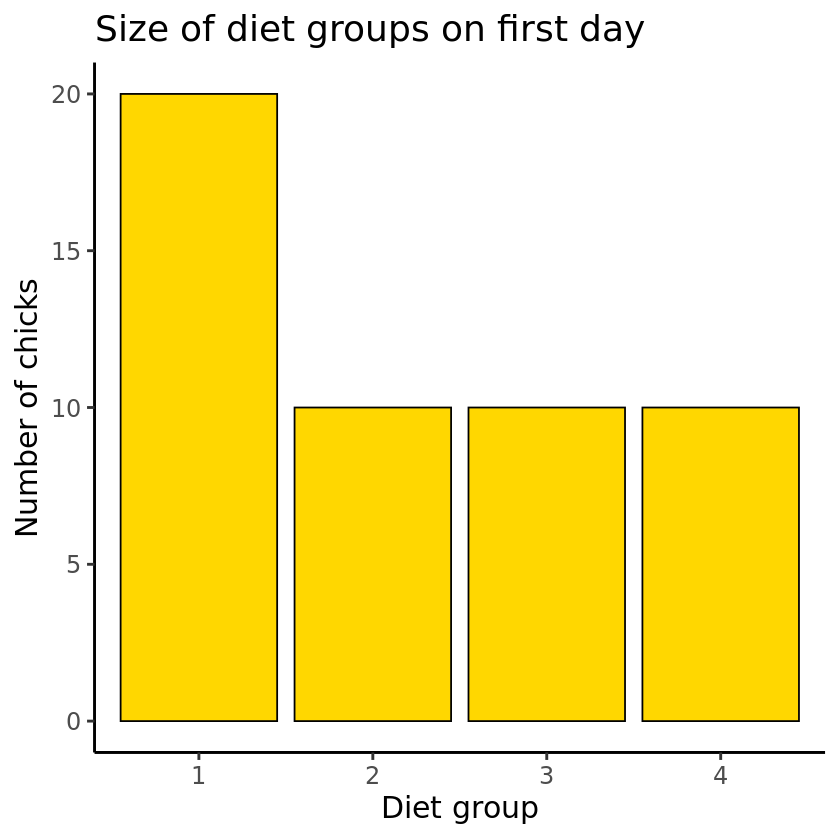

In [22]:
# Size of diet groups bar chart
ChickWeight %>%
    filter(Time == 0) %>%
    ggplot(aes(x=Diet)) +
        geom_bar(color = 'black', fill = 'gold') + ### Color set here ###
        labs( title = 'Size of diet groups on first day',
             x = 'Diet group',
             y = 'Number of chicks'
        ) +
    theme_classic(base_size = 18)

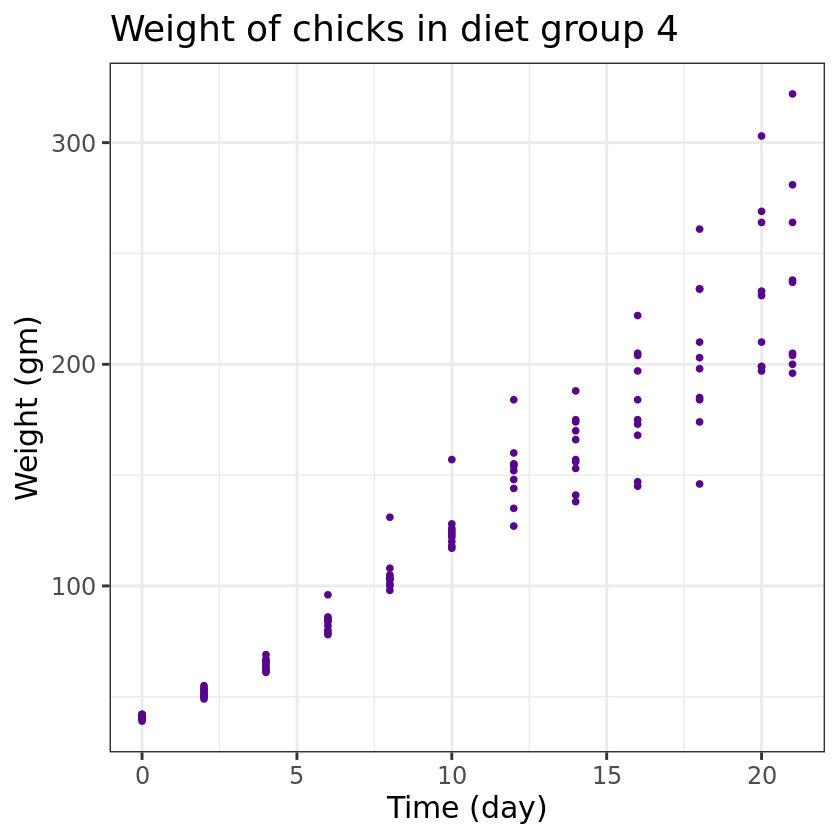

In [23]:
# Chick weight diet group 4 scatter plot
ChickWeight %>%
    filter(Diet == 4) %>%
    ggplot(aes(x = Time, y = weight)) +
        geom_point(color = '#57068C') + ### color set here ###
        labs( title = "Weight of chicks in diet group 4",
             x = 'Time (day)',
             y = 'Weight (gm)'
        ) +
    theme_bw(base_size = 18)

### Dynamic colors
It is often helpful to use color to represent a variable in the data frame. We do this by using the aesthetic mapping `aes()` to pair color properties of the plot with variables in the data frame.


We can add additional layer to the plot to specify the color pallet that we wish to use and set the title for the legend.

```scale_PROPERTY_manual( name= "LEGEND_TITLE", values= VECTOR_OF_COLORS)```

#### Examples

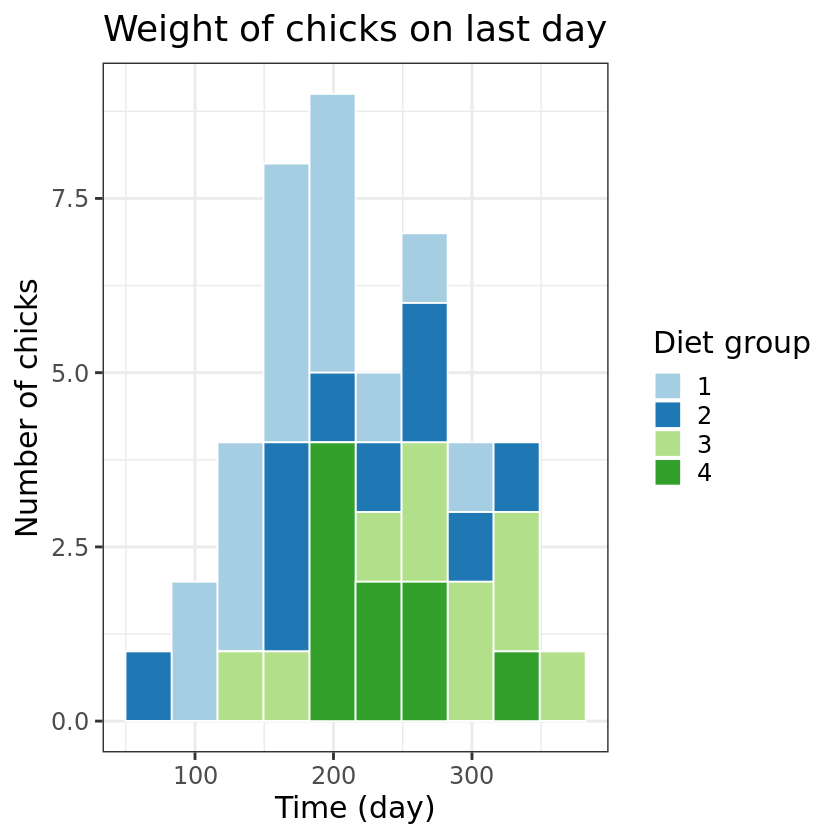

In [38]:
# Chick weights on last day
ChickWeight %>%
    filter(Time == max(Time)) %>%
    ggplot(aes(x = weight, fill = Diet)) + ## fill color set here ##
        geom_histogram(bins = 10, color = 'white') + ## white border ##
        scale_fill_manual( name = 'Diet group', ## legend title ##
            values = c('#a6cee3', '#1f78b4', '#b2df8a', '#33a02c') ## custom pallet ##
        ) +
        labs( title = "Weight of chicks on last day",
             x = 'Time (day)',
             y = 'Number of chicks'
        ) +
    theme_bw(base_size = 18)

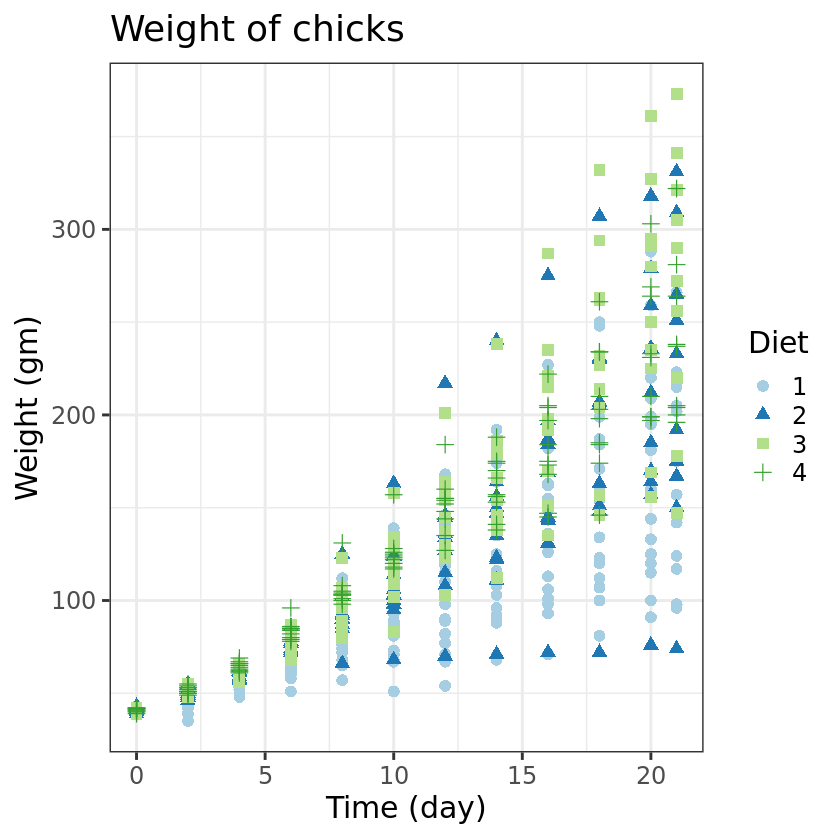

In [45]:
# Chick weight scatter plot
ChickWeight %>%
    ggplot(aes(x = Time, y = weight, color = Diet, shape = Diet)) + ## color set here ##
        geom_point(size =3) + ## increase size of the dots ##
        scale_color_manual(
            values = c('#a6cee3', '#1f78b4', '#b2df8a', '#33a02c') ## custom pallet ##
        ) +
        labs( title = "Weight of chicks",
             x = 'Time (day)',
             y = 'Weight (gm)'
        ) +
    theme_bw(base_size = 18)

### Accessibility

Color is a useful to for adding emphasis, grouping data and making things pretty. However, not everyone perceives color in the same way or at all. Here are some tips for ensuring that everyone can understand your plots.
 - In scatter plots, let both color and shape depend on the variable. Do this by including `shape = COLUMN` inside `aes()`. 
 - Choose a color-blind friendly pallet. 
     * [pallet shared by NYU biology lab](https://siegal.bio.nyu.edu/color-palette/)
     * [R Graphics Cookbook section on color-blind friendly pallets](https://r-graphics.org/recipe-colors-palette-discrete-colorblind#)
     * [Color brewer 2 pallet generator](https://colorbrewer2.org/)